In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import anfis
import membership.mfDerivs
import membership.membershipfunction
import numpy


In [2]:
left = []
right = []
center = []
gas = []
rot = []

In [3]:
with open("right.txt") as file:
    for line in file:
        txt = line.split("\n")
        right.append(float(txt[0])) 

with open("left.txt") as file:
    for line in file:
        txt = line.split("\n")
        left.append(float(txt[0])) 

with open("center.txt") as file:
    for line in file:
        txt = line.split("\n")
        center.append(float(txt[0])) 

with open("gas.txt") as file:
    for line in file:
        txt = line.split("\n")
        gas.append(float(txt[0])) 

with open("rot.txt") as file:
    for line in file:
        txt = line.split("\n")
        rot.append(float(txt[0])) 

In [4]:
right = np.array(right)
left = np.array(left)
center = np.array(center)
gas = np.array(gas)
rot = np.array(rot)

In [5]:
inputs = np.vstack([right,left]).T
rot.shape
center_2 = np.expand_dims(center,-1)

In [6]:
mf = [[['gaussmf',{'mean':20.,'sigma':9.}],['gaussmf',{'mean':60.,'sigma':9.}],['gaussmf',{'mean':120.,'sigma':9.}]]]


In [7]:
mfc = membership.membershipfunction.MemFuncs(mf)

In [8]:
anf = anfis.ANFIS(center_2, gas, mfc)

In [9]:
anf.trainHybridJangOffLine(epochs=14)
print(round(anf.consequents[-1][0],6))
print(round(anf.consequents[-2][0],6))
print(round(anf.fittedValues[9][0],6))
if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
	print('test is good')


current error: 30020.354493287523
current error: 27598.059512159667
current error: 25414.290517532594
current error: 23404.139688541964
current error: 21335.181359017617
current error: 19186.757324798353
current error: 16935.719512597156
current error: 14556.05448040357
current error: 12017.136530774866
current error: 9279.329157871369
current error: 6291.000076812422
current error: 3082.4845199158794
current error: 1325.6048544068647
62.192211
-0.070532
15.492967


Plotting errors


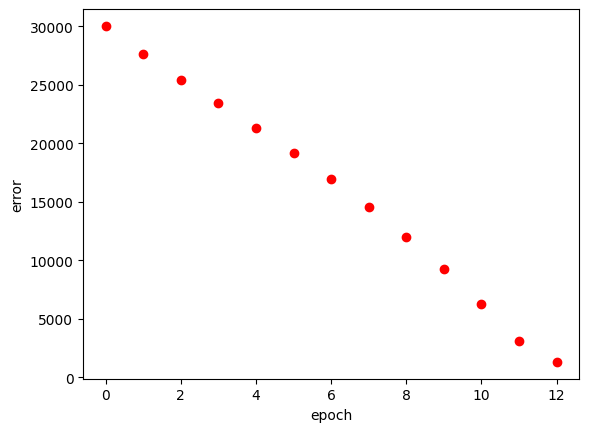

Plotting results


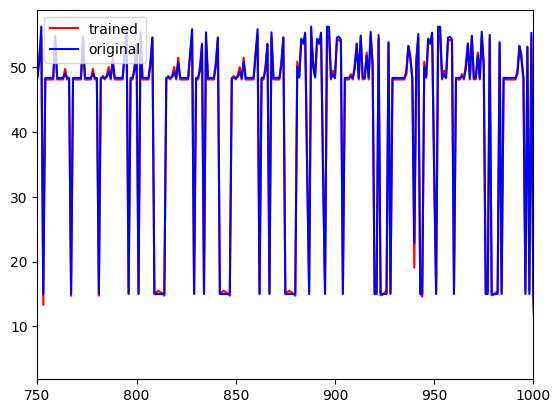

In [10]:

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()


In [18]:
anfis.predict(anf,center_2[0:1])

array([[48.08590614]])

In [19]:
gas[0]

48.33318765842149